In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from fractions import Fraction


# dyn_lorenz = {"sigma":16.0, "R":45.92, "b": 4.0}
dyn_henon = {"a":1.4, "b":0.3}
x0 = np.array([0.0, 0.0])
v1 = np.array([1.0, 0.0])
v2 = np.array([0.0, 1.0])
x_dot = []
x_norm = []
# cum = np.array([0,0,0])

def Henon (x0, dyn):
    a = dyn['a'] 
    b = dyn['b']
    x = x0[0]
    y = x0[1]
    #print (x0)
    return np.array([1 - a* (x**2) + y, b * x])


def linearized_henon (x0, dyn, y_henon):
    a = dyn['a'] 
    b = dyn['b']
    x = y_henon[0]
    y = y_henon[1]
    pre_dot = np.array([[-2*a*x, 1],
                    [b, 0],
                    ])
    af_dot = np.dot(pre_dot, x0)
    return af_dot


# def RungeKutta (dyn, f, dt, x0):
#     k1 = f(x0, dyn) #[x,y,z]*0.1 example
#     k2 = f(x0+0.5*k1*dt,dyn)
#     k3 = f(x0 + 0.5*k2*dt, dyn)
#     k4 = f(x0 + k3*dt, dyn)
    
#     x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) *dt
#     return x

# def RungeKutta_linearized (dyn, f, dt, x0, y):
#     k1 = f(x0, dyn, y) #[x,y,z]*0.1 example
#     k2 = f(x0+0.5*k1*dt,dyn, y)
#     k3 = f(x0 + 0.5*k2*dt, dyn, y)
#     k4 = f(x0 + k3*dt, dyn, y)
    
#     x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) * dt

#     return x

def f_t (dyn, f, linearized_f, dt, x0, T):
    x = np.empty(shape=(len(x0),T))
    v1_prime = np.empty(shape=(len(x0),T))
    v2_prime = np.empty(shape=(len(x0),T))
    x[:, 0] = x0
    v1_prime[:, 0] = v1
    v2_prime[:, 0] = v2
    cum = np.array([0,0])
    
    for i in range(1,T):
        x[:, i] = Henon(x[:, i-1],dyn)
#         print (x)
        v1_prime[:, i] = linearized_henon (v1_prime[:, i-1], dyn, x[:, i-1])
        v2_prime[:, i] = linearized_henon (v2_prime[:, i-1], dyn, x[:, i-1])
        
        norm1 = np.linalg.norm(v1_prime[:, i])
        v1_prime[:, i] = v1_prime[:, i]/norm1
        
        GSC1 = np.dot(v1_prime[:, i], v2_prime[:, i])
        v2_prime[:, i] = v2_prime[:, i] - GSC1*v1_prime[:, i]
        
        norm2 = np.linalg.norm(v2_prime[:, i])
        v2_prime[:, i] = v2_prime[:, i]/norm2
        

        cum = cum + np.log2(np.array([norm1,norm2]))
#         print("total time taken this loop: ", end_time - start_time)
    cum = cum/(T*dt)
    return x , cum


In [95]:
x,cum_critical = f_t(dyn_henon, Henon, linearized_henon, 1, np.array([(np.sqrt(609) - 7)/28, (3*(np.sqrt(609) - 7))/280]), 50)

In [3]:
x,cum = f_t(dyn_henon, Henon, linearized_henon, 1, np.array([0,0]), 5000)

In [6]:
np.sort(x[0])

array([-1.28466255, -1.28395165, -1.28328599, ...,  1.27283056,
        1.27288119,  1.27297342])

In [7]:
np.sort(x[1])

array([-0.38539877, -0.38518549, -0.3849858 , ...,  0.38184917,
        0.38186436,  0.38189203])

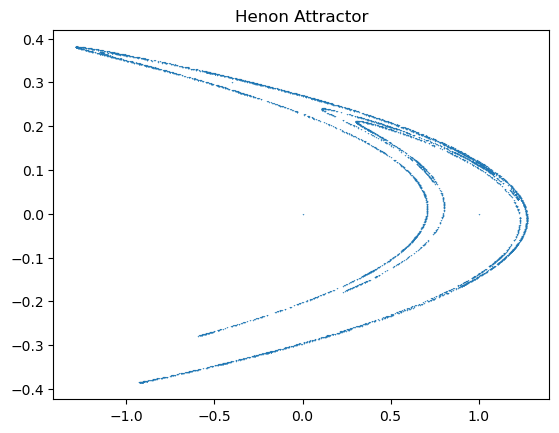

In [4]:
plt.plot(x[0], x[1], '^', alpha = 0.8, markersize=0.3)
plt.title('Henon Attractor')
plt.savefig('Henon_Attractor.png')
plt.show()

plt.close()